# Chronic Kidney Disease : 

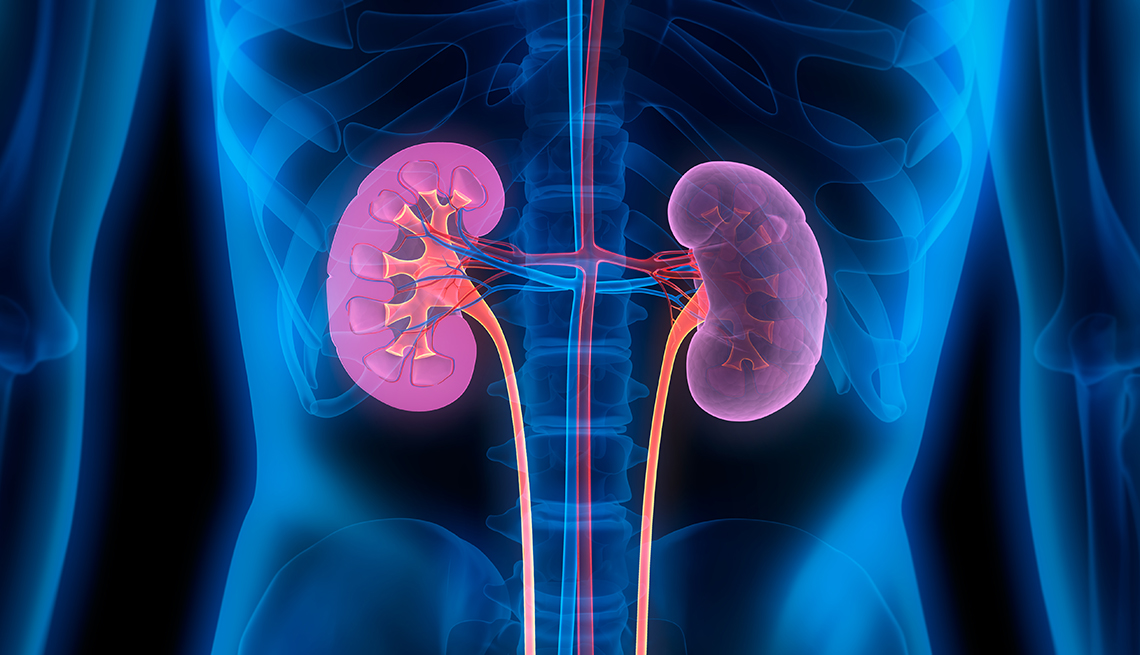]

# OverView :

 
* Chronic kidney disease (CKD) is a long-term condition where the kidneys do not work as well as they should. It's a common condition often associated with getting older. It can affect anyone, but it's more common in people who are black or of south Asian origin.

* Chronic kidney disease occurs when a disease or condition impairs kidney function, causing kidney damage to worsen over several months or years. Diseases and conditions that cause chronic kidney disease include: Type 1 or type 2 diabetes. High blood pressure

* cause of kidney disease : Diabetes and high blood pressure are the most common causes of chronic kidney disease (CKD). Your health care provider will look at your health history and may do tests to find out why you have kidney disease. The cause of your kidney disease may affect the type of treatment you receive.

# Import libraries :

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, precision_score, recall_score, f1_score


# models 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



# Data :

In [2]:
data = pd.read_csv("/kaggle/input/ckdisease/kidney_disease.csv")

#Five columns will be shown randomly
data.sample(5).style.set_properties(**{'background-color': 'white', 
                                        'color': 'blue', 'font-weight': 'bold'})

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
257,257,38.000000,60.000000,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,91.000000,36.000000,0.700000,135.000000,3.700000,14.000000,46,9100,5.8,no,no,no,good,no,no,notckd
182,182,61.000000,80.000000,1.020000,0.000000,0.000000,nan,normal,notpresent,notpresent,131.000000,23.000000,0.800000,140.000000,4.100000,11.300000,35,nan,nan,no,no,no,good,no,no,ckd
317,317,58.000000,70.000000,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,102.000000,48.000000,1.200000,139.000000,4.300000,15.000000,40,8100,4.9,no,no,no,good,no,no,notckd
132,132,50.000000,nan,nan,nan,nan,normal,nan,notpresent,notpresent,219.000000,176.000000,13.800000,136.000000,4.500000,8.600000,24,13200,2.7,yes,no,no,good,yes,yes,ckd
233,233,51.000000,100.000000,1.015000,2.000000,0.000000,normal,normal,notpresent,present,93.000000,20.000000,1.600000,146.000000,4.500000,nan,nan,nan,nan,no,no,no,poor,no,no,ckd


In [3]:
# Rename columns to make them more readable
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
data.rename(columns=col, inplace=True)
data.head(5)

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
print(data.columns)
print('----------------')
print(data.shape)

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')
----------------
(400, 26)


In [5]:
#data.describe
#---------------------------------------
# Check if there are duplicate rows
data.duplicated().sum()

0

# specific values :

In [6]:
# View the specific values in the categorical columns
for col in data:
    print(f'{col}  : == {data[col].unique()} values')
    print('============================================')

id  : == [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

# Missing Values : 

In [7]:
# Check if there are any missing values
missing_values=data.isna().sum().sort_values(ascending=False)
print(missing_values)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
id                           0
class                        0
dtype: int64


<Axes: >

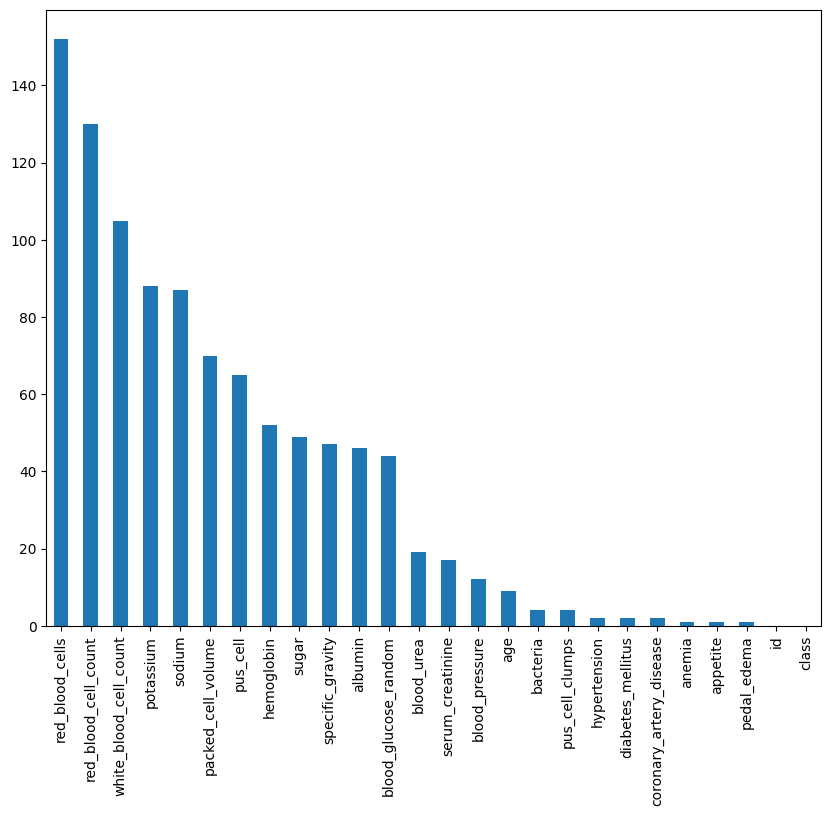

In [8]:
plt.figure(figsize=(10, 8))
missing_values.plot(kind='bar')

In [9]:
# filling null values 

def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [10]:
# filling null values using random sampling method :

for col in data:
    random_value_imputation(col)

In [11]:
# Check if there are any missing values
missing_values=data.isna().sum().sort_values(ascending=False)
print(missing_values)

id                         0
age                        0
anemia                     0
pedal_edema                0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
hemoglobin                 0
potassium                  0
sodium                     0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
blood_pressure             0
class                      0
dtype: int64


In [12]:
# or we can use : 
#data.isnull().sum()

# Replace incorrect values

In [13]:
# replace incorrect values

data['coronary_artery_disease'].replace(to_replace = {'\tno':'no'},inplace=True)
data['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


In [14]:
data['diabetes_mellitus'] = data['diabetes_mellitus'].map({'no': 0, 'yes': 1})
data['pedal_edema'] = data['pedal_edema'].map({'no': 0, 'yes': 1})
data['hypertension'] = data['hypertension'].map({'no': 0, 'yes': 1})
data['coronary_artery_disease'] = data['coronary_artery_disease'].map({'no': 0, 'yes': 1})
data['anemia'] = data['anemia'].map({'no': 0, 'yes': 1})
#-------------------------------------------------------
data['class'] = data['class'].map({'ckd': 0, 'not ckd': 1})
data['red_blood_cells'] = data['red_blood_cells'].map({'abnormal': 0, 'normal': 1})
data['pus_cell'] = data['pus_cell'].map({'abnormal': 0, 'normal': 1})
data['pus_cell_clumps'] = data['pus_cell_clumps'].map({'notpresent': 0, 'present': 1})
data['bacteria'] = data['bacteria'].map({'notpresent': 0, 'present': 1})
data['appetite'] = data['appetite'].map({'poor': 0, 'good': 1})

**Note**
* #If you have NAN data abroad, you can run it on this code
* #However, when executing the missing value step, all NAN will be removed, but this code, as a precaution, can be used as an alternative method for the missing value step.
* But frankly, the missing values ​​step is more secure

In [15]:
# Read note :)

'''
data['anemia'].replace(to_replace = {'nan':'0'},inplace=True)
data['age'].replace(to_replace = {'nan':'0'},inplace=True)
data['pedal_edema'].replace(to_replace = {'nan':'0'},inplace=True)
data['appetite'].replace(to_replace = {'nan':'0'},inplace=True)
data['coronary_artery_disease'].replace(to_replace = {'nan':'0','\tno':'no'},inplace=True)
data['diabetes_mellitus'].replace(to_replace = {'nan':'0','\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['hypertension'].replace(to_replace = {'nan':'0'},inplace=True)
data['blood_pressure'].replace(to_replace = {'nan':'0'},inplace=True)
data['hemoglobin'].replace(to_replace = {'nan':'0'},inplace=True)
data['potassium'].replace(to_replace = {'nan':'0'},inplace=True)
data['sodium'].replace(to_replace = {'nan':'0'},inplace=True)
data['serum_creatinine'].replace(to_replace = {'nan':'0'},inplace=True)
data['blood_urea'].replace(to_replace = {'nan':'0'},inplace=True)
data['specific_gravity'].replace(to_replace = {'nan':'0'},inplace=True)
data['albumin'].replace(to_replace = {'nan':'0'},inplace=True)
data['sugar'].replace(to_replace = {'nan':'0'},inplace=True)
data['pus_cell_clumps'].replace(to_replace = {'nan':'0'},inplace=True)
data['pus_cell'].replace(to_replace = {'nan':'0'},inplace=True)
data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})
data['bacteria'].replace(to_replace = {'nan':'0'},inplace=True)
data['blood_glucose_random'].replace(to_replace = {'nan':'0'},inplace=True)
'''

"\ndata['anemia'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['age'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['pedal_edema'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['appetite'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['coronary_artery_disease'].replace(to_replace = {'nan':'0','\tno':'no'},inplace=True)\ndata['diabetes_mellitus'].replace(to_replace = {'nan':'0','\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)\ndata['hypertension'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['blood_pressure'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['hemoglobin'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['potassium'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['sodium'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['serum_creatinine'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['blood_urea'].replace(to_replace = {'nan':'0'},inplace=True)\ndata['specific_gravity'].replace(to_replace = {'nan':'0'},in

In [16]:
#\t?
data['white_blood_cell_count'].replace(to_replace = {'\t?':'0'},inplace=True)
data['red_blood_cell_count'].replace(to_replace = {'\t?':'0'},inplace=True)
data['packed_cell_volume'].replace(to_replace = {'\t?':'0'},inplace=True)

---------------------------------

# Specified values after modifying the data :

In [17]:
# View the specific values in the categorical columns
for col in data:
    print(f'{col}  : == {data[col].unique()} values')
    print('============================================')

id  : == [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

# --------------------------------------------------------

# Number of Unique Values :

In [18]:
# Print the number of unique values for each column
for col in data.columns:
    print(f'{col} has == ( {data[col].nunique()} ) values')

id has == ( 400 ) values
age has == ( 76 ) values
blood_pressure has == ( 10 ) values
specific_gravity has == ( 5 ) values
albumin has == ( 6 ) values
sugar has == ( 6 ) values
red_blood_cells has == ( 2 ) values
pus_cell has == ( 2 ) values
pus_cell_clumps has == ( 2 ) values
bacteria has == ( 2 ) values
blood_glucose_random has == ( 146 ) values
blood_urea has == ( 118 ) values
serum_creatinine has == ( 84 ) values
sodium has == ( 34 ) values
potassium has == ( 40 ) values
hemoglobin has == ( 115 ) values
packed_cell_volume has == ( 44 ) values
white_blood_cell_count has == ( 92 ) values
red_blood_cell_count has == ( 49 ) values
hypertension has == ( 2 ) values
diabetes_mellitus has == ( 2 ) values
coronary_artery_disease has == ( 2 ) values
appetite has == ( 2 ) values
pedal_edema has == ( 2 ) values
anemia has == ( 2 ) values
class has == ( 2 ) values


# Draw Data :

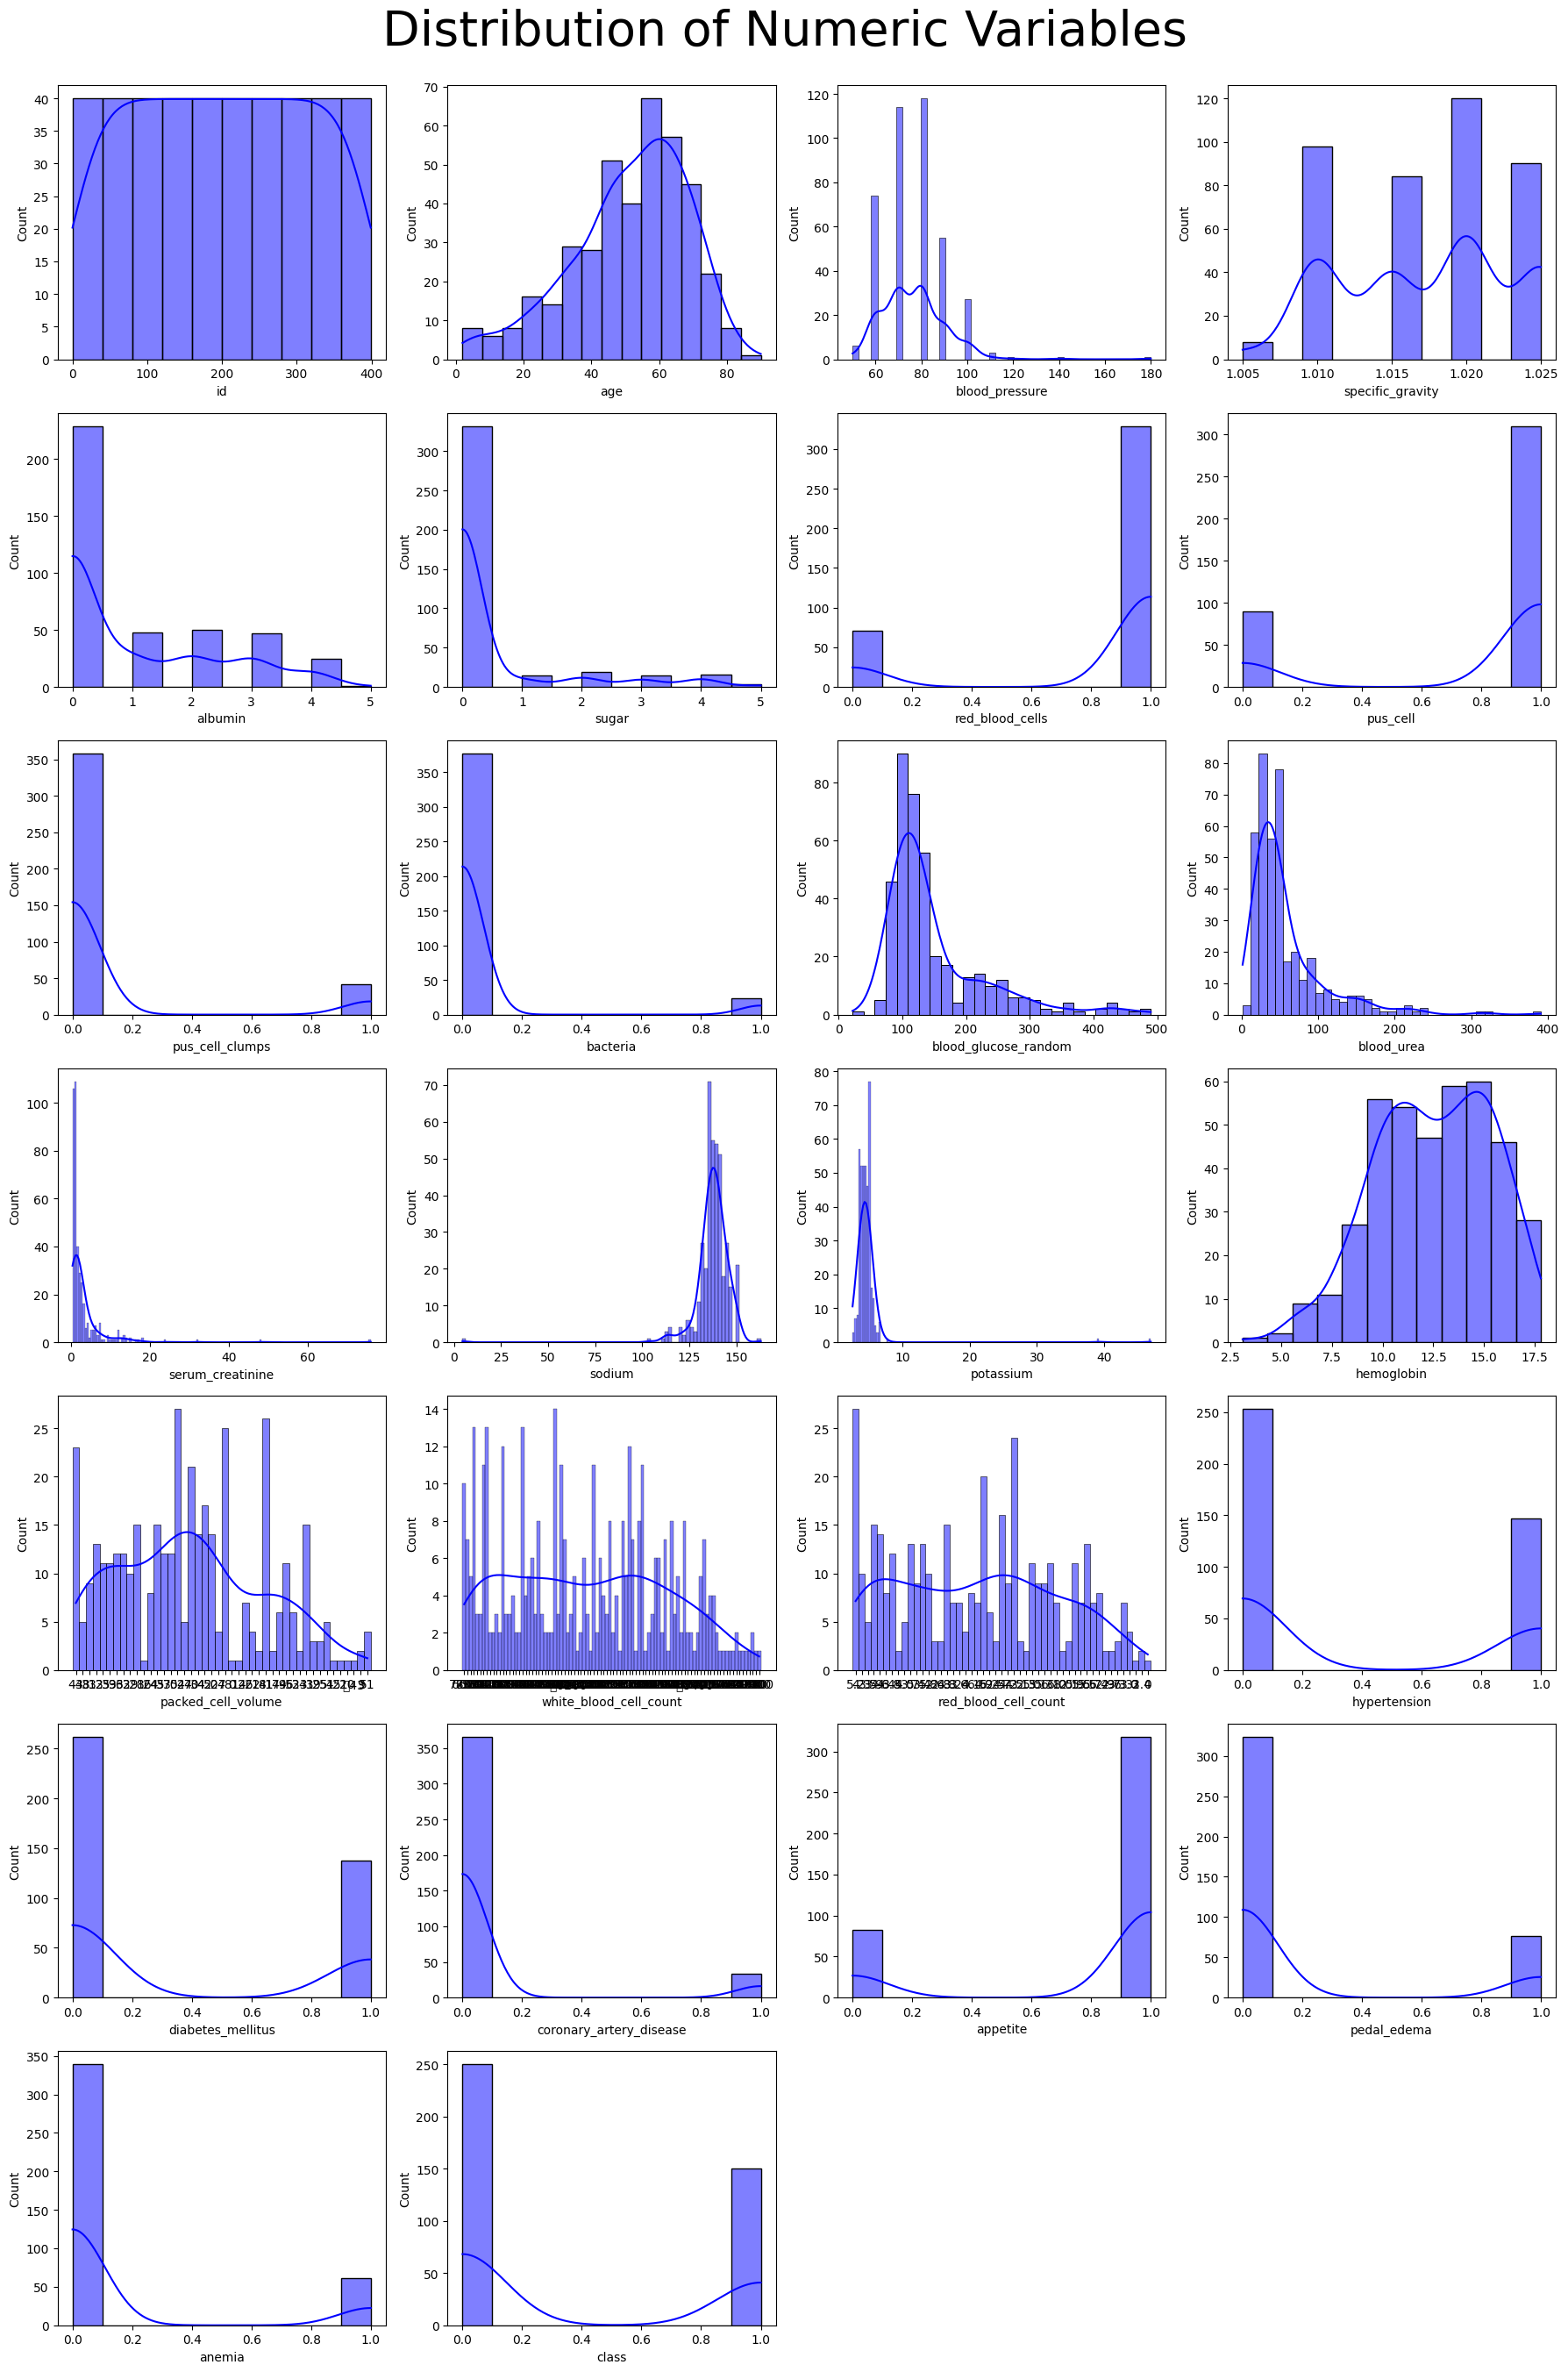

In [19]:
# Distribution of numeric variables
plt.figure(figsize=(18, 27))
plotnumber = 1

for col in data:
    if plotnumber <= len(data):
        ax = plt.subplot(7, 4, plotnumber)
        sns.histplot(x=data[col], kde=True, color='blue')
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# Correlation Matrix :

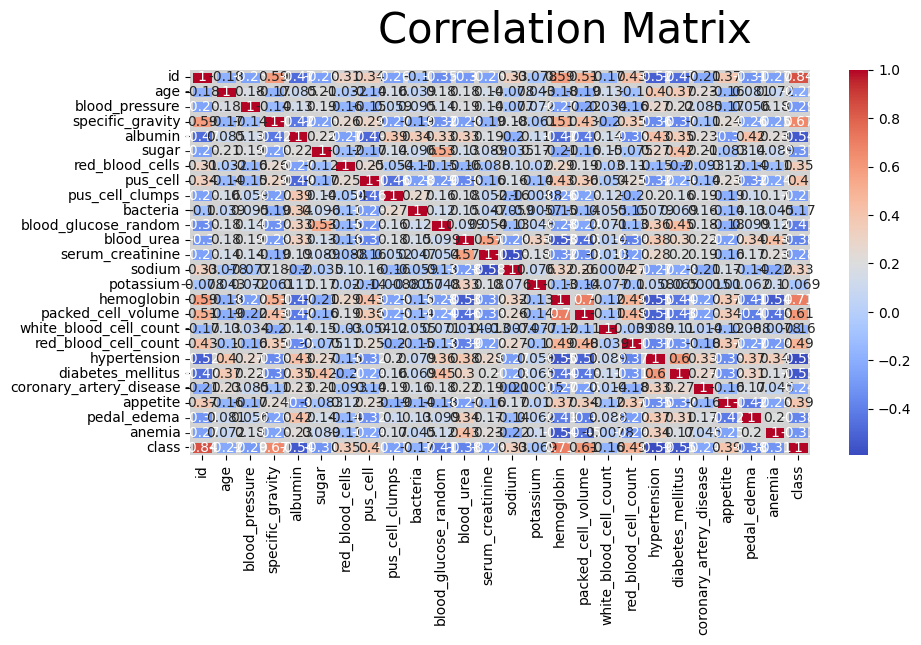

In [20]:
# Correlation matrix of numeric columns
num_df = data

plt.figure(figsize=(10, 5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=2.5, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=30, y=1)
plt.show()

# Split Data :

In [21]:
X = data.drop("class", axis='columns')
y=data['class']


In [22]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

# Create Model :

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
   
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    class_report = classification_report(y_test, y_test_pred)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    
    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")
    
    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.97143

Confusion Matrix:
[[71  1]
 [ 0 48]]

Test Accuracy of K-Nearest Neighbors: 0.99167
Test Precision of K-Nearest Neighbors: 0.98980
Test Recall of K-Nearest Neighbors: 0.99306
Test F1 Score of K-Nearest Neighbors: 0.99135

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[72  0]
 [ 2 46]]

Test Accuracy of Random Forest: 0.98333
Test Precision of Random Forest: 0.98649
Test Recall of Random Forest: 0.97917
Test F1 Score of Random Forest: 0.98251

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gaussian Naive Bayes: 0.96786

Confusion Matrix:
[[69  3]
 [ 8 40]]

Test Accuracy of Gaussian Naive Bayes: 0.90833
Test Precision of Gaussian Naive Bayes: 0.91317
Test Recall of Gaussian Naive Bayes: 0.89583
Test F1 Score of Gaussian Naive Bayes: 0.90265

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        72
           1       0.93      0.83      0.88        48

    accuracy                           0.91       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



In [28]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_name = 'Extra Trees'
etc_results = evaluate_model(etc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Extra Trees: 1.00000

Confusion Matrix:
[[72  0]
 [ 4 44]]

Test Accuracy of Extra Trees: 0.96667
Test Precision of Extra Trees: 0.97368
Test Recall of Extra Trees: 0.95833
Test F1 Score of Extra Trees: 0.96475

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[72  0]
 [ 1 47]]

Test Accuracy of Decision Tree: 0.99167
Test Precision of Decision Tree: 0.99315
Test Recall of Decision Tree: 0.98958
Test F1 Score of Decision Tree: 0.99129

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [30]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_name = 'AdaBoost'
ada_results = evaluate_model(ada, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of AdaBoost: 1.00000

Confusion Matrix:
[[72  0]
 [ 1 47]]

Test Accuracy of AdaBoost: 0.99167
Test Precision of AdaBoost: 0.99315
Test Recall of AdaBoost: 0.98958
Test F1 Score of AdaBoost: 0.99129

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gradient Boosting Machine: 1.00000

Confusion Matrix:
[[72  0]
 [ 1 47]]

Test Accuracy of Gradient Boosting Machine: 0.99167
Test Precision of Gradient Boosting Machine: 0.99315
Test Recall of Gradient Boosting Machine: 0.98958
Test F1 Score of Gradient Boosting Machine: 0.99129

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [32]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)  # verbose=0 is used to reduce the output during training and make the output more concise
model_name = 'CatBoost'
cat_results = evaluate_model(cat, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of CatBoost: 1.00000

Confusion Matrix:
[[72  0]
 [ 0 48]]

Test Accuracy of CatBoost: 1.00000
Test Precision of CatBoost: 1.00000
Test Recall of CatBoost: 1.00000
Test F1 Score of CatBoost: 1.00000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [33]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'GBM', 'CatBoost',],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], 
              dtc_results['Accuracy'], rfc_results['Accuracy'], 
              etc_results['Accuracy'], ada_results['Accuracy'], 
              gbm_results['Accuracy'],
              cat_results['Accuracy']]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
7,CatBoost,1.000000
0,KNN,0.991667
2,Logistic Regression,0.991667
5,Extra Trees,0.991667
6,GBM,0.991667
3,Decision Tree,0.983333
4,Random Forest,0.966667
1,Gaussian Naive Bayes,0.908333


In [34]:
recall = pd.DataFrame({
    'Model':  ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'GBM', 'CatBoost',],
    'Score': [knn_results['Recall'], gnb_results['Recall'], 
              dtc_results['Recall'], rfc_results['Recall'], 
              etc_results['Recall'], ada_results['Recall'], 
              gbm_results['Recall'],
              cat_results['Recall'],]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
7,CatBoost,1.000000
0,KNN,0.993056
2,Logistic Regression,0.989583
5,Extra Trees,0.989583
6,GBM,0.989583
3,Decision Tree,0.979167
4,Random Forest,0.958333
1,Gaussian Naive Bayes,0.895833


# Thanks for Reading . 